<a href="https://colab.research.google.com/github/ZiadMAlsawy/ML_Project/blob/Raneem_Branch/Copy_of_preprossing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import skew
from sklearn.preprocessing import QuantileTransformer




In [ ]:
loan = pd.read_csv('/content/Loan.csv')


In [ ]:
loan.head()


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [ ]:
loan.tail()


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,2072-10-03,20,53227,574,Employed,Associate,0,32055,48,Married,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


In [ ]:
loan.shape


(20000, 36)

In [ ]:
loan.dtypes


,0
ApplicationDate,object
Age,int64
AnnualIncome,int64
CreditScore,int64
EmploymentStatus,object
EducationLevel,object
Experience,int64
LoanAmount,int64
LoanDuration,int64
MaritalStatus,object


In [ ]:
loan.describe()


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


# Data Preprocessing


In [ ]:
loan = loan.drop_duplicates()
loan.isnull().sum()
loan = loan.dropna()


In [ ]:
#Identify numerical and categorical features
numerical_features = loan.select_dtypes(include=['number']).columns
numerical_features = numerical_features.drop('RiskScore', errors='ignore')  # Drop target variable from numerical features



In [ ]:
categorical_features = loan.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('RiskScore', errors='ignore')  # Drop target variable from categorical features

In [ ]:
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)


In [ ]:
# Create preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])


In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One hot encode categorical features
])



In [ ]:
# the full preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])



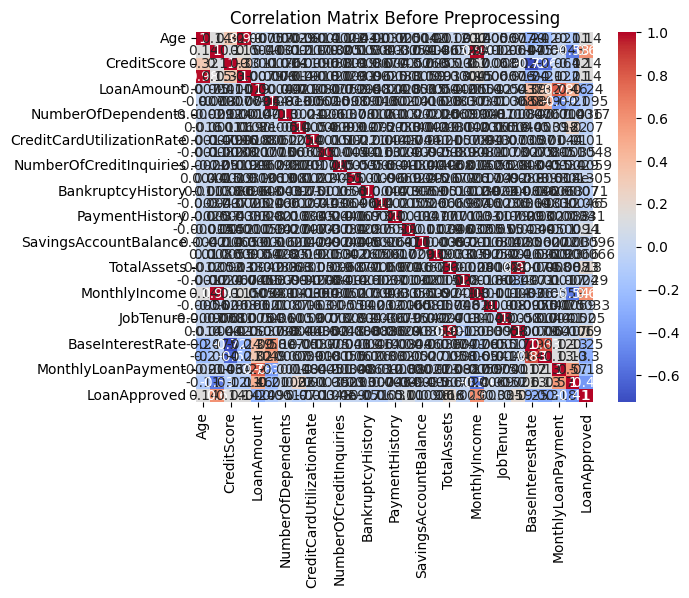

In [ ]:
# Compute correlations for numerical features only
corrMatrix = loan[numerical_features].corr()
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Before Preprocessing")
plt.show()



In [ ]:
loan_cleaned = loan.drop_duplicates().dropna() # Perform data cleaning and assign to loan_cleaned


In [ ]:
X = loan_cleaned.drop(columns='RiskScore')  # Features (excluding target)
y = loan_cleaned['RiskScore']  # Target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Preprocessing with the ColumnTransformer
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)



In [ ]:
print("Transformed Training Data (First 5 Rows):")
print(X_train_processed[:5])


Transformed Training Data (First 5 Rows):
  (0, 0)	0.1875
  (0, 1)	0.24517359741414332
  (0, 2)	-0.2647058823529412
  (0, 3)	0.1875
  (0, 4)	-0.2811365791452768
  (0, 5)	0.6666666666666666
  (0, 7)	-0.5035971223021583
  (0, 8)	-0.3678473154321504
  (0, 9)	1.0
  (0, 11)	-0.5672195734796066
  (0, 14)	0.3333333333333333
  (0, 15)	-0.5714285714285714
  (0, 16)	-0.24806738202376832
  (0, 17)	0.19590268886043533
  (0, 18)	-0.4080546716051959
  (0, 19)	0.4695555572940707
  (0, 20)	0.25189248101595735
  (0, 21)	0.11759131444673679
  (0, 22)	0.3333333333333333
  (0, 23)	-0.38508262813724536
  (0, 24)	0.34983776051663984
  (0, 25)	1.0752044060168358
  (0, 26)	-0.32734248032723184
  (0, 27)	-0.43472689904191725
  (0, 14278)	1.0
  :	:
  (4, 7)	0.4028776978417266
  (4, 8)	0.46571714521952734
  (4, 9)	-0.5
  (4, 10)	0.5
  (4, 11)	0.43160741738139047
  (4, 14)	-0.6666666666666666
  (4, 15)	1.0
  (4, 16)	-0.2988346602053767
  (4, 17)	-0.5153649167733675
  (4, 18)	0.8660742750157951
  (4, 19)	0.1483926

In [ ]:
numerical_features = loan_cleaned.select_dtypes(include=['number']).columns


<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


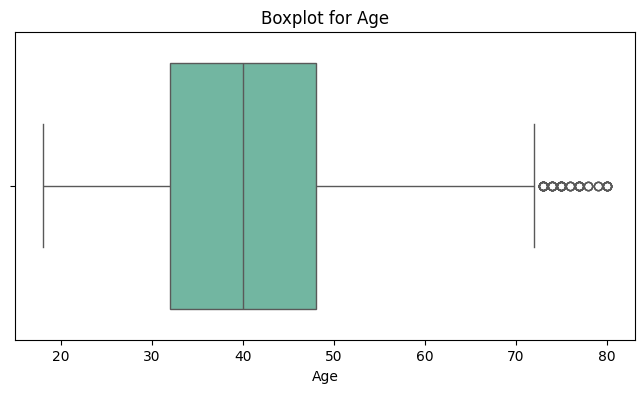

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


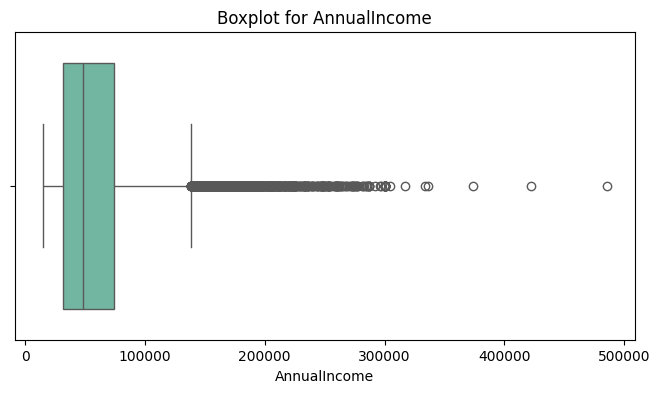

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


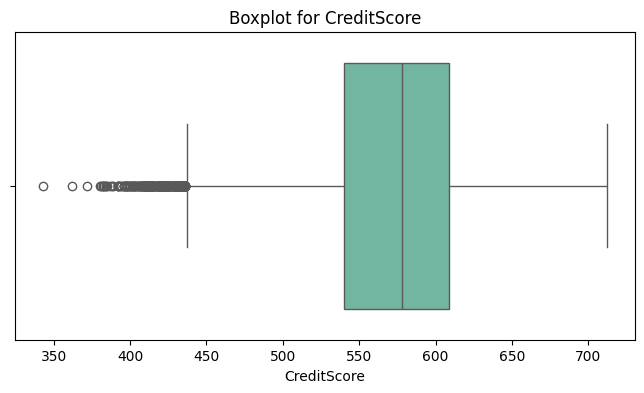

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


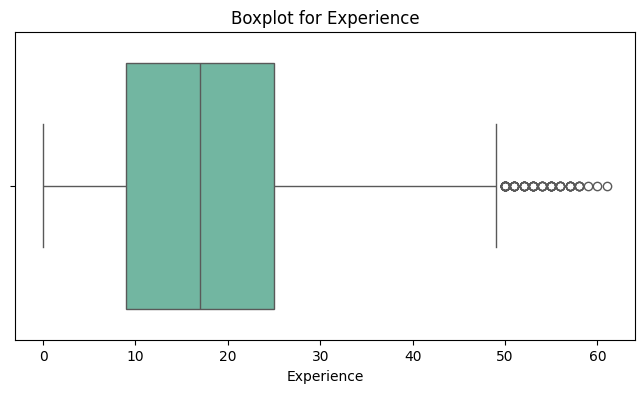

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


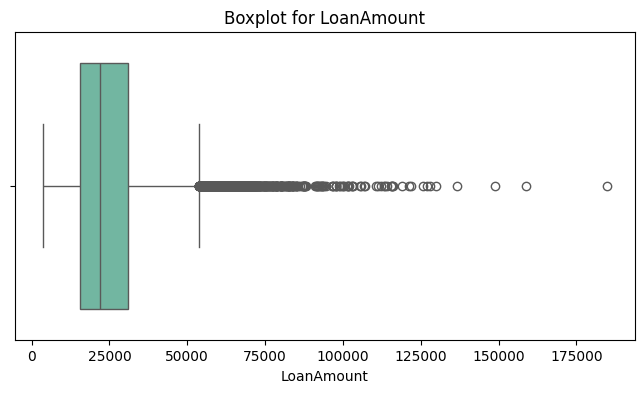

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


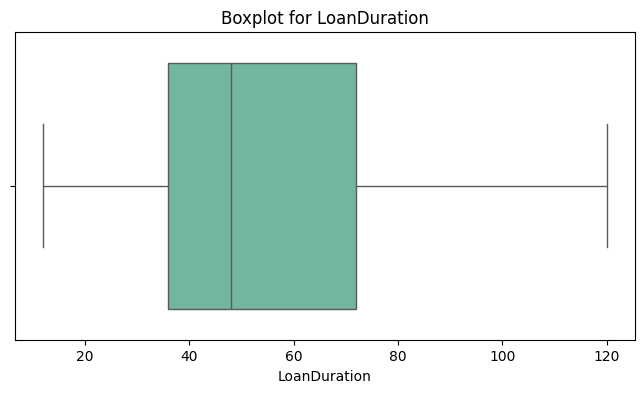

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


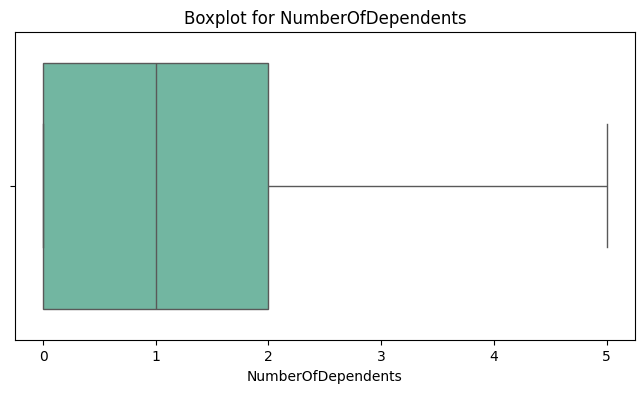

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


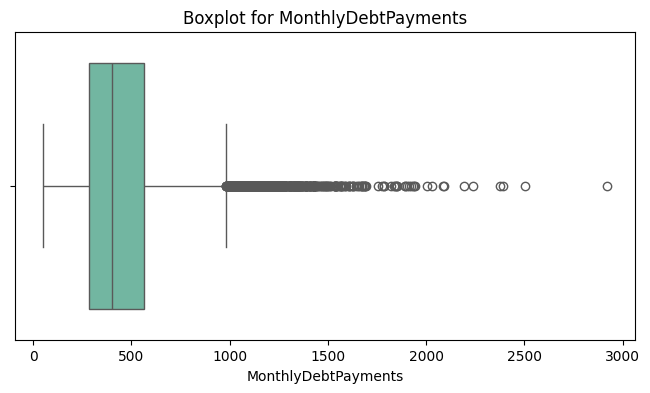

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


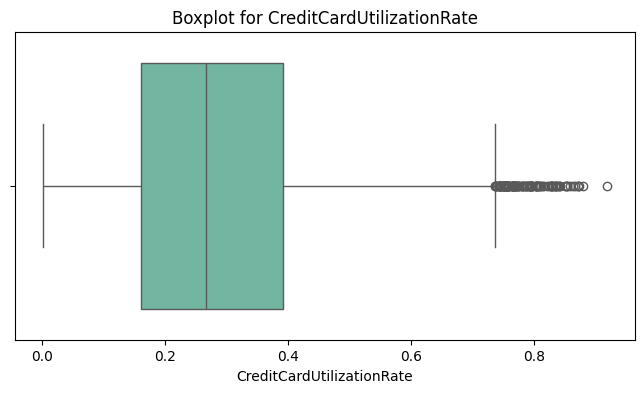

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


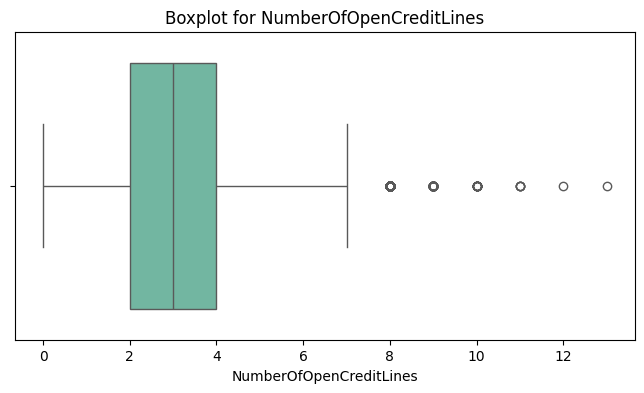

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


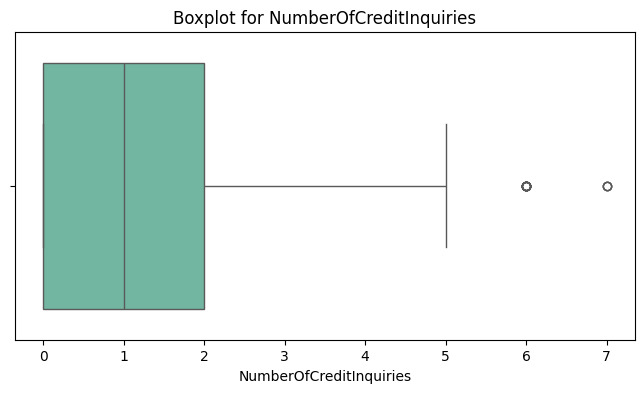

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


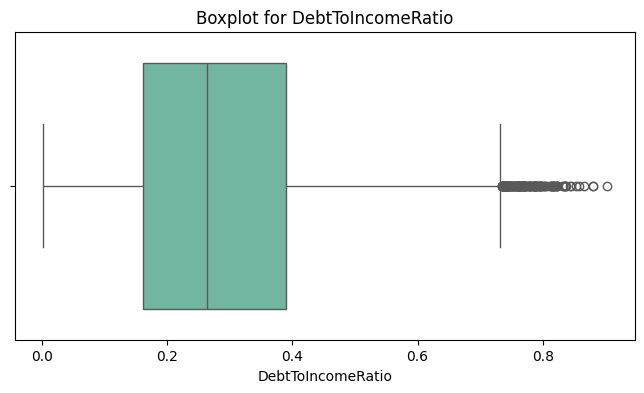

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


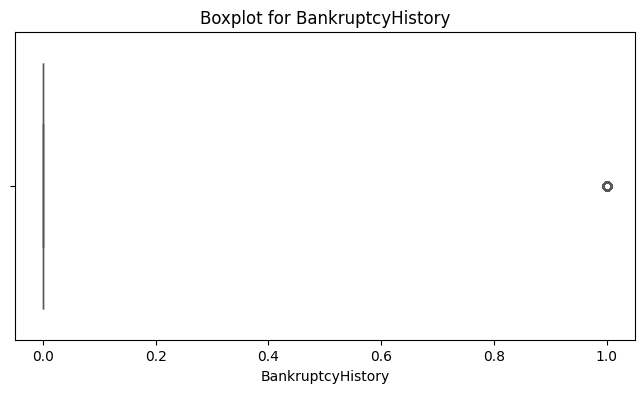

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


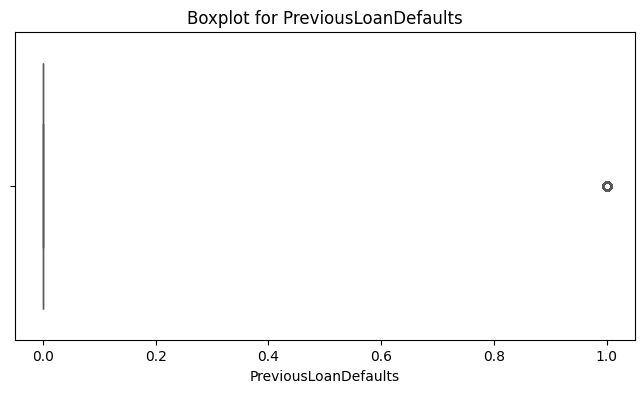

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


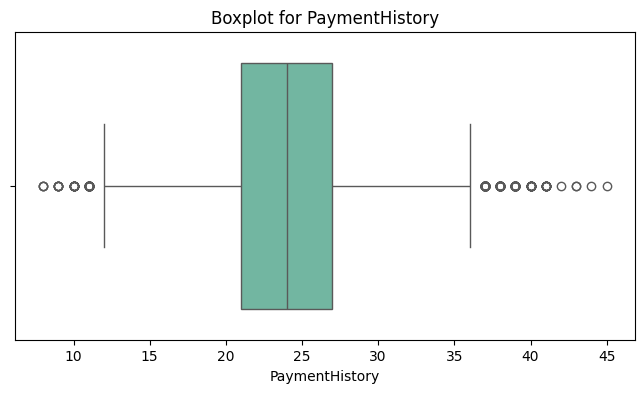

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


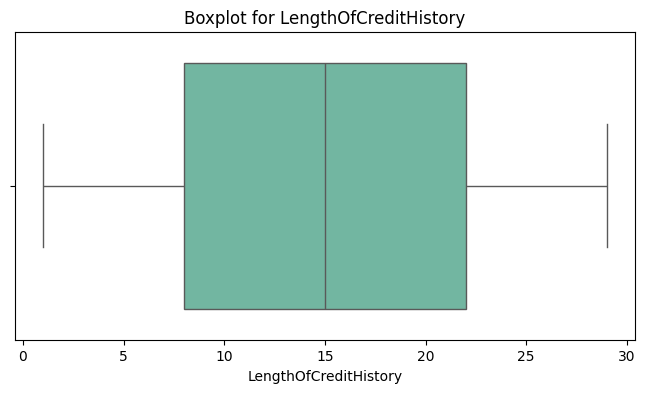

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


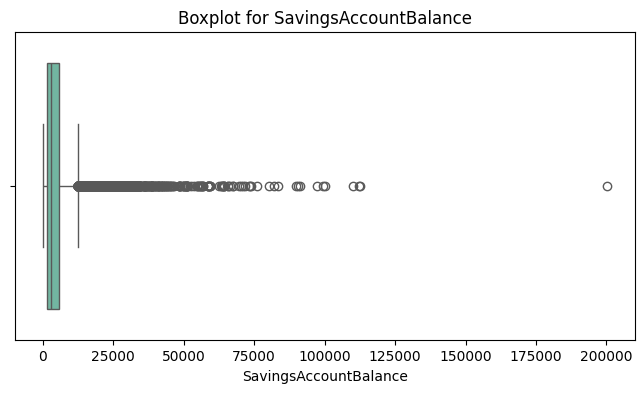

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


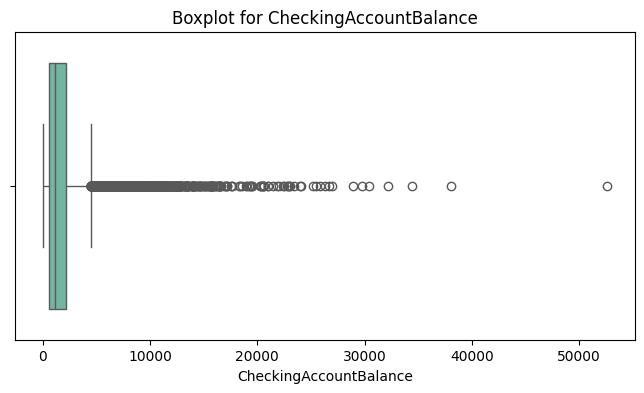

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


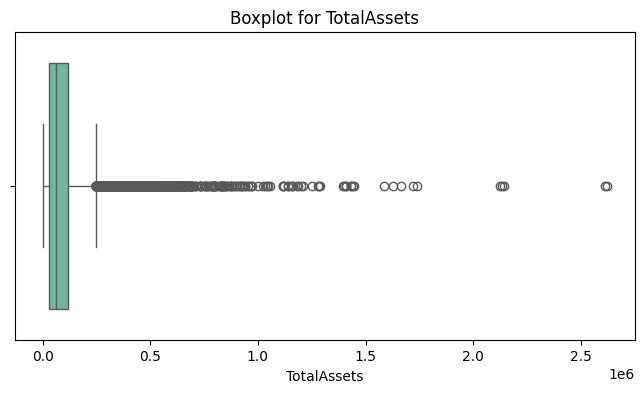

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


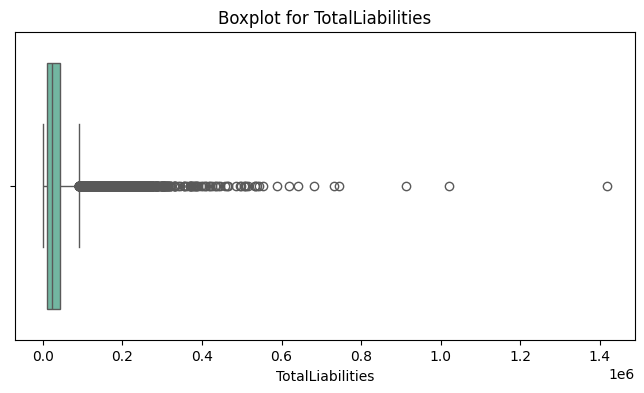

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


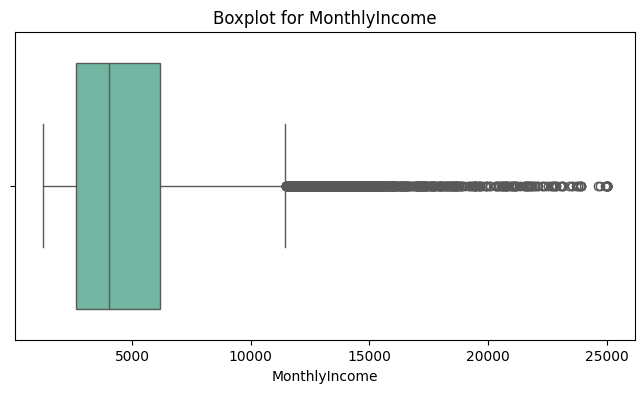

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


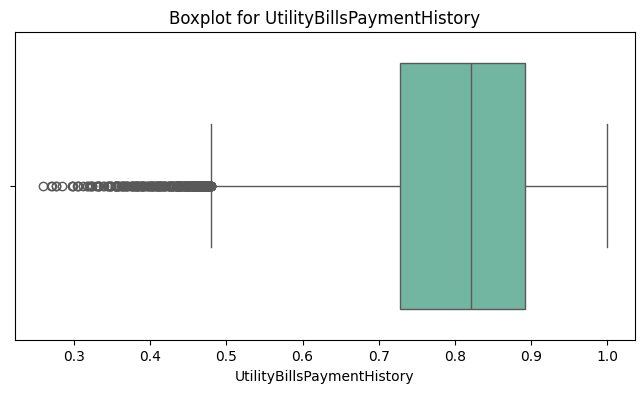

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


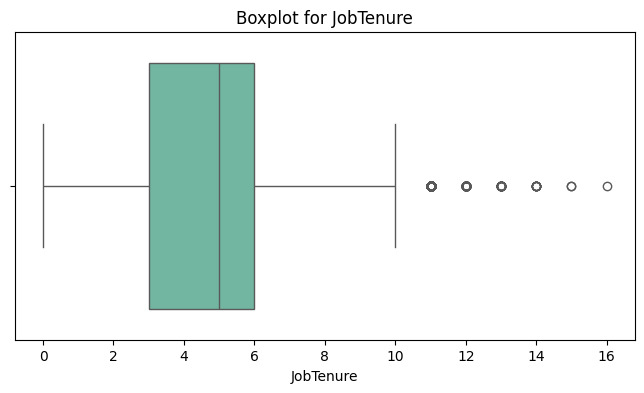

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


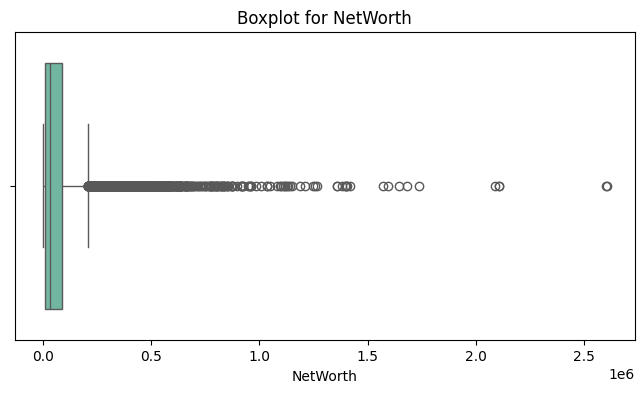

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


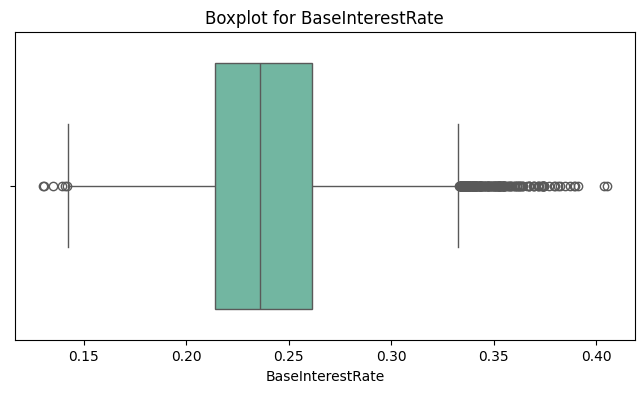

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


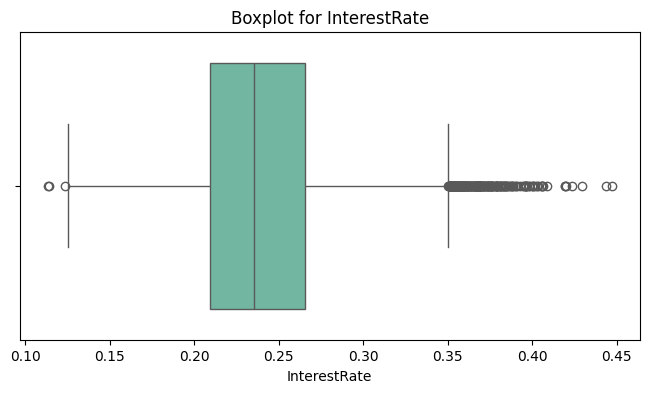

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


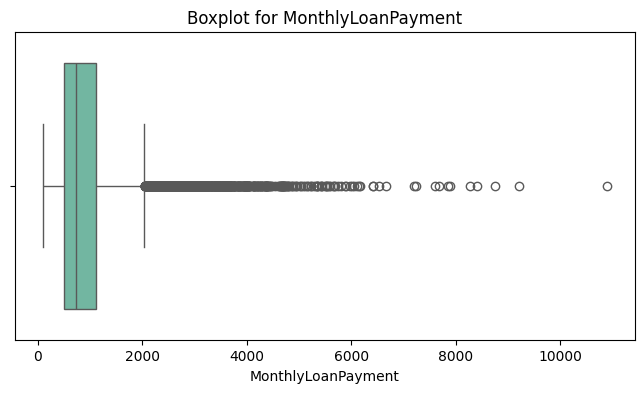

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


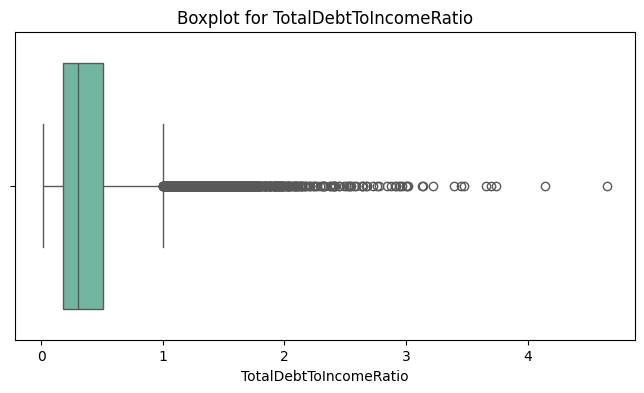

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


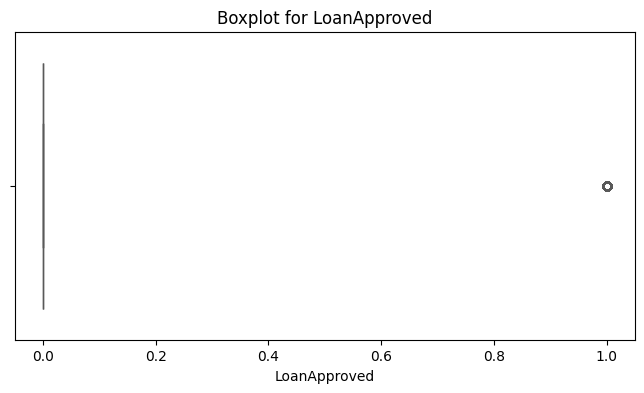

<ipython-input-29-c65a8c2c75ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')


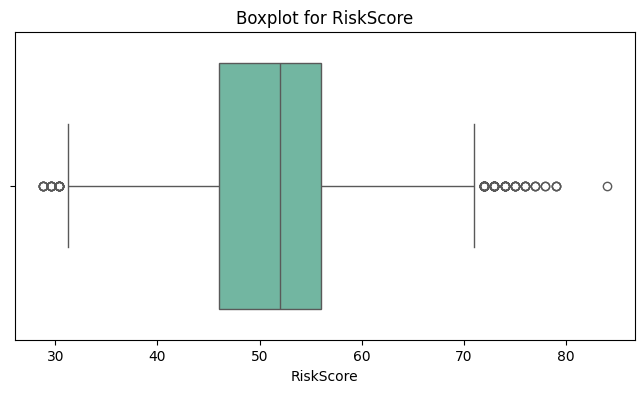

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set2')
    plt.title(f'Boxplot for {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
print(loan.columns)


Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')


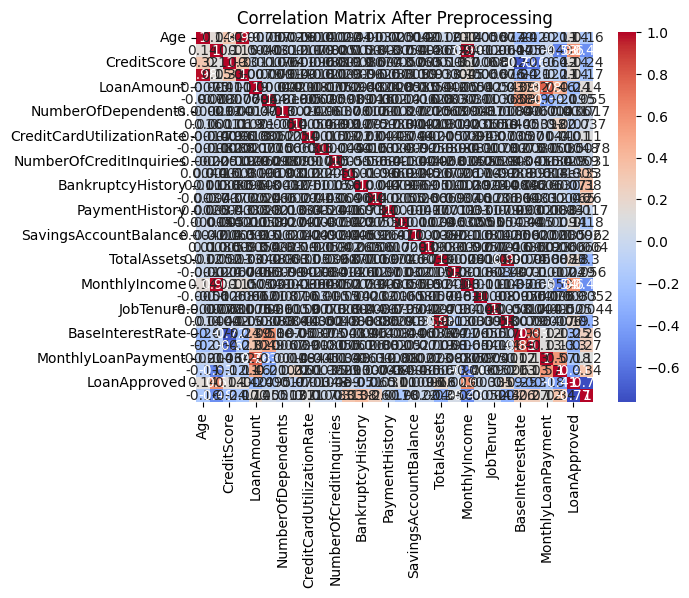

In [ ]:
corrMatrix = loan[numerical_features].corr()  # Compute correlations for processed data
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix After Preprocessing")
plt.show()

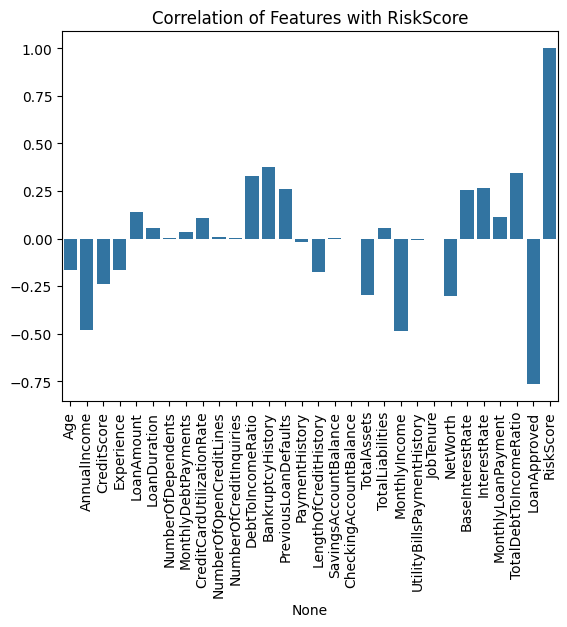

In [ ]:
# Ensure 'RiskScore' exists in the DataFrame
if 'RiskScore' in loan_cleaned.columns:
    numerical_features = loan_cleaned.select_dtypes(include=['number']).columns

    corr_target = loan_cleaned[numerical_features].corr()['RiskScore']  # Correlations with target

    sns.barplot(x=corr_target.index, y=corr_target.values)
    plt.title('Correlation of Features with RiskScore')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Column 'RiskScore' is missing from the dataset.")



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np



In [ ]:
# if 'RiskScore' in loan_cleaned.columns:
#     # Split data into features (X) and target (y)
#     X = loan_cleaned.drop(columns='RiskScore')  # Features
#     y = loan_cleaned['RiskScore']  # Target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)



In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_processed, y_train)


LinearRegression()

In [ ]:
y_pred = linear_reg.predict(X_test_processed)


In [ ]:
# ... (previous code)
MSE = mean_squared_error(y_test,y_pred)
RMSE = root_mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
r2Score = r2_score(y_test,y_pred)
Errors = {}
Errors['MSE'] = MSE
Errors['RMSE'] = RMSE
Errors['MAE'] = MAE
Errors['r2_Score'] = r2Score
models_Errors = {}
models_Errors['Linear Regression'] = Errors
print(f"MSE for Linear Regression: {MSE} ")
print(f"RMSE for Linear Regression: {RMSE}")
print(f"MAE for Linear Regression: {MAE}")
print(f"R2_Score for Linear Regression: {r2Score}")
print(models_Errors)

MSE for Linear Regression: 3.428215669495253 
RMSE for Linear Regression: 1.8515441311227914
MAE for Linear Regression: 1.4616045966924494
R2_Score for Linear Regression: 0.9440668419225218
{'Linear Regression': {'MSE': 3.428215669495253, 'RMSE': 1.8515441311227914, 'MAE': 1.4616045966924494, 'r2_Score': 0.9440668419225218}}


In [ ]:
KNN_Reg = KNeighborsRegressor(2)
KNN_Reg.fit(X_train_processed,y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
yhat = KNN_Reg.predict(X_test_processed)

In [ ]:
k_values = range(1, 25)
mse_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_processed, y_train)
    y_pred = knn_model.predict(X_test_processed)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# plt.figure(figsize=(10, 6))
# plt.plot(k_values, mse_values, marker='o', linestyle='-', color='b')
# plt.xticks(k_values)
# plt.xlabel('(k)')
# plt.ylabel('(MSE)')
# plt.title('MSE vs. K')
# plt.show()

In [ ]:
MSE = mean_squared_error(y_test,yhat)
RMSE = root_mean_squared_error(y_test,yhat)
MAE = mean_absolute_error(y_test,yhat)
r2Score = r2_score(y_test,yhat)
Errors = {}
Errors['MSE'] = MSE
Errors['RMSE'] = RMSE
Errors['MAE'] = MAE
Errors['r2_Score'] = r2Score
models_Errors['KNN'] = Errors
print(f"MSE for KNN: {MSE} ")
print(f"RMSE for KNN: {RMSE}")
print(f"MAE for KNN: {MAE}")
print(f"R2_Score for KNN: {r2Score}")
print(models_Errors)

MSE for KNN: 28.892549999999996 
RMSE for KNN: 5.375179066784659
MAE for KNN: 3.9413
R2_Score for KNN: 0.5286027128365063
{'Linear Regression': {'MSE': 3.428215669495253, 'RMSE': 1.8515441311227914, 'MAE': 1.4616045966924494, 'r2_Score': 0.9440668419225218}, 'KNN': {'MSE': 28.892549999999996, 'RMSE': 5.375179066784659, 'MAE': 3.9413, 'r2_Score': 0.5286027128365063}}


In [ ]:
RG = Ridge()
RG.fit(X_train_processed,y_train)


Ridge()

In [ ]:
yhat = RG.predict(X_test_processed)

In [ ]:
MSE = mean_squared_error(y_test,yhat)
RMSE = root_mean_squared_error(y_test,yhat)
MAE = mean_absolute_error(y_test,yhat)
r2Score = r2_score(y_test,yhat)
Errors = {}
Errors['MSE'] = MSE
Errors['RMSE'] = RMSE
Errors['MAE'] = MAE
Errors['r2_Score'] = r2Score
models_Errors['Ridge'] = Errors
print(f"MSE for Ridge Regression: {MSE} ")
print(f"RMSE for Ridge Regression: {RMSE}")
print(f"MAE for Ridge Regression: {MAE}")
print(f"R2_Score for Ridge Regression: {r2Score}")
print(models_Errors)

MSE for Ridge Regression: 3.4280085214052516 
RMSE for Ridge Regression: 1.8514881909980554
MAE for Ridge Regression: 1.46155646787836
R2_Score for Ridge Regression: 0.9440702216535483
{'Linear Regression': {'MSE': 3.428215669495253, 'RMSE': 1.8515441311227914, 'MAE': 1.4616045966924494, 'r2_Score': 0.9440668419225218}, 'KNN': {'MSE': 28.892549999999996, 'RMSE': 5.375179066784659, 'MAE': 3.9413, 'r2_Score': 0.5286027128365063}, 'Ridge': {'MSE': 3.4280085214052516, 'RMSE': 1.8514881909980554, 'MAE': 1.46155646787836, 'r2_Score': 0.9440702216535483}}
